Analisis exploratorio de AIRNB - EDA

In [1]:
#Importamos las librerias basicas y necesarias
import pandas as pd #Libreria de manipulacion de datos
import numpy as np #Libreria numerica muy potente
import matplotlib.pyplot as plt #Libreria para graficos
import seaborn as sns #Libreria para graficos basada en Matplotlib (es mas simple)

In [34]:
# Leemos los datos desde el archivo que esta en la carpeta data\raw

df_NY = pd.read_csv('../data/raw/AB_NYC_2019.csv')

In [20]:
df_NY.head(6) #Vemos los primeros 6 datos para ver que se cargaron correctamente

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [21]:
df_NY.shape #Esto nos brinda las dimensiones de los datos ("filas","columnas")

(48895, 16)

In [22]:
df_NY.columns #Vemos los features (asi vamos a llamar a las columnas) que tiene nuestro dataset

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
print("cantidad de barrios:", len(df_NY["neighbourhood_group"].unique())) 
#len brinda la longitud de un array
#unique() brinda los valores sin repetir 
#df["host_id"] metodo de filtrado por features

cantidad de barrios: 5


In [35]:
df_NY[["minimum_nights","price","availability_365"]].describe()
#Brinda los estadisticos basicos de las columnas seleccionadas

,minimum_nights,price,availability_365
count,48895.000000,48895.000000,48895.000000
mean,7.029962,152.720687,112.781327
std,20.510550,240.154170,131.622289
min,1.000000,0.000000,0.000000
25%,1.000000,69.000000,0.000000
50%,3.000000,106.000000,45.000000
75%,5.000000,175.000000,227.000000
max,1250.000000,10000.000000,365.000000


Formas de filtrado de los datos
df_airbnb.loc[[4,5,9,40], ["price Code", "minimum_nights", "availability_365"]]
El loc permite filtrar por el nombre directo de la columna

df_airbnb.iloc[[4,5,9,40], [9,10,15]]
El iloc permite filtrar por el número de columna

df_airbnb.iloc[20:30,3:6]
df_airbnb[fila(desde:hasta),columna(desde:hasta)] --> Esta es la forma de interpretar el filtro

In [36]:
df_filter = df_NY[df_NY["price"]<df_NY["price"].mean()]
#Esta es otra forma de filtrar datos por condiciones
#En este caso filtramos por precio, los alquileres que esten por debajo de la media
df_filter.describe()
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34016 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34016 non-null  int64  
 1   name                            34006 non-null  object 
 2   host_id                         34016 non-null  int64  
 3   host_name                       33999 non-null  object 
 4   neighbourhood_group             34016 non-null  object 
 5   neighbourhood                   34016 non-null  object 
 6   latitude                        34016 non-null  float64
 7   longitude                       34016 non-null  float64
 8   room_type                       34016 non-null  object 
 9   price                           34016 non-null  int64  
 10  minimum_nights                  34016 non-null  int64  
 11  number_of_reviews               34016 non-null  int64  
 12  last_review                     

In [26]:
df_filter["price"].max() #Vemos si se aplico el filtro, visualizamos el valor maximo del precio

152

In [27]:
df_NY["price"].mean() #Validamos y vemos que filtro correctamente los datos por la media

152.7206871868289

Veamos cuantos NaN (Not a Number) tiene nuestro dataset¶

In [28]:
df_NY.isna().sum() #De esta forma vemos el total de valores NaN en nuestro dataset
#Si no se utiliza el sum() va a devolver la condicion True o False de los campos

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Vemos que las columnas relacionadas a las fechas de los comentarios y las cantidades de comentarios por mes tienen algunos NaN, estas columnas no son representativas para nuestro analisis en este momento, asique vamos a eliminarlas.

En caso de que nos encontremos con features que si nos serian útiles, podemos utilizar alguna estrategia para reemplazarlos,

df_NY["last_review"].fillna(inplace = True)

Hay muchas otras estrategias para tratar con valores NaN, les recomiendo ir googleandolas a medida que se vayan encontrando con los distintos problemas.

Veamos nivel porcentual que tantos NaN ocupan nuestro dataset, al ser bajo podemos prescindir de ellos

In [37]:
df_NY.isna().sum()/df_NY.shape[0]*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [38]:
#Aprovechamos a eliminar otras columnas que no seran necesarias
df_NY.drop(['name','id','host_name','last_review','reviews_per_month','calculated_host_listings_count'], axis=1, inplace=True)
#cuando vean en la mayoria de las funciones AXIS es = 1 (columna), 0 (fila)


Si solo queremos eliminar los valores NaN y quedarnos con los demas datos debiamos utilizar lo siguiente

df_NY.dropna(axis=0, how='any', subset=['name', 'host_name'], inplace=True)
Si necesitamos eliminar duplicados

df_NY.drop_duplicates(inplace = True)

In [40]:
#Agrupamos por "neighbourhood_group" y mostramos el precio mas alto por barrio
df_NY.groupby(['neighbourhood_group'])[["price"]].max()

,price
neighbourhood_group,
Bronx,2500
Brooklyn,10000
Manhattan,10000
Queens,10000
Staten Island,5000


La función groupby es muy útil para explorar nuestro dataset y realizar análisis. Es muy recomendable explorarla y tener el dominio de esta funcion

Visualizacion
En esta etapa podemos ver de forma visual la consistencia de nuestros datos, también podemos inferir, sacar algunas conclusiones e incluso armar un informe

Recomendación: Ver ejemplos de gráficos en https://seaborn.pydata.org/examples/index.html

In [42]:
df_NY.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibil

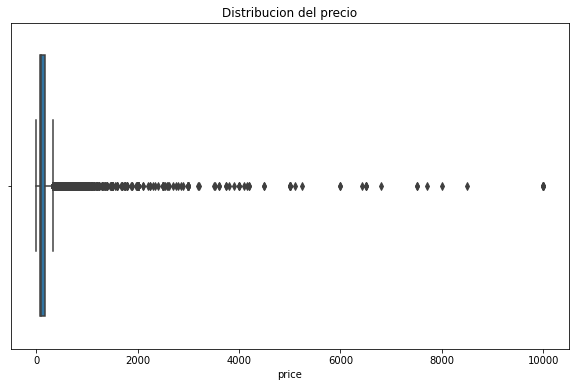

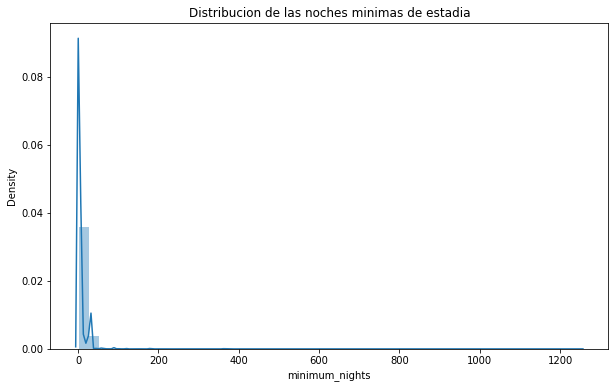

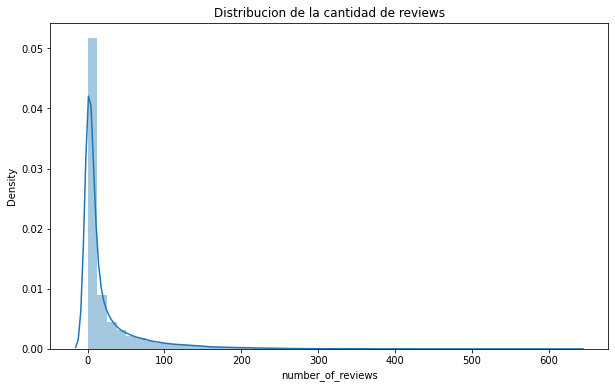

In [44]:
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(df_NY["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(2, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.distplot(df_NY["minimum_nights"])

plt.figure(3, figsize=(10,6))
plt.title("Distribucion de la cantidad de reviews")
sns.distplot(df_NY["number_of_reviews"])


Con estos primeros gráficos ya podemos ver que tenemos outliers, valores atípicos

Vemos en el primer grafico de precios que el valor máximo es de USD 10.000 la noche, es un valor que tiene poco sentido en nuestro análisis, asique tenemos que ver como lo tratamos.

En el segundo grafico vemos que también tenemos valores extraños, la estadía mínima de 1250 dias, el dueño pide que el alquiler sea de alrededor de 3 años como mínimo... en tal caso no aplica para la plataforma de airbnb, deberíamos hacer algo con esos datos.

En la ultima vemos que la mayoria de los datos estan en 0, esto puede deberse a que muchos clientes que alquilan no deja ningun comentarios, son valores que tienen alguna explicación lógica

Limpiando outliers

Vamos a filtrar los datos para quedarnos con los que representen del 10 al 90 porciento de los mismos

In [45]:
#Quitando valores extremos en el precio
p10 = np.percentile(df_NY["price"], 10)
p90 = np.percentile(df_NY["price"], 90)
df_2_NY = df_NY[(df_NY["price"] >= p10) & (df_NY["price"] <= p90)]

In [46]:
#Quitando valores extremos en la cantidad de noches minimas
p10 = np.percentile(df_2_NY["minimum_nights"], 10)
p90 = np.percentile(df_2_NY["minimum_nights"], 90)
df_3_NY = df_2_NY[(df_2_NY["minimum_nights"] >= p10) & (df_2_NY["minimum_nights"] <= p90)]

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribucion de las noches minimas de estadia'}, xlabel='minimum_nights', ylabel='Density'>

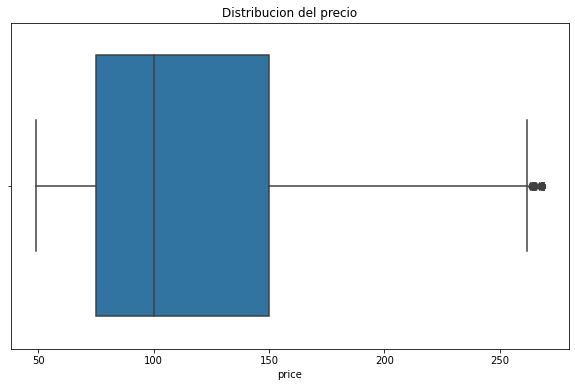

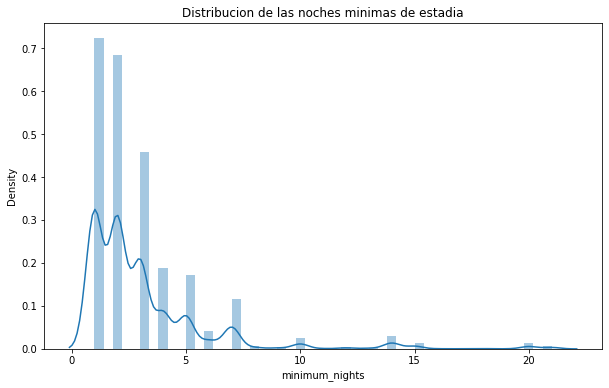

In [47]:
# Volvemos a graficar luego de sacar los datos
plt.figure(1, figsize=(10,6)) #Tamaño del grafico
plt.title("Distribucion del precio") #Titulo
sns.boxplot(df_3_NY["price"]) #Grafico, en este caso estamos usando la libreria seaborn

plt.figure(2, figsize=(10,6))
plt.title("Distribucion de las noches minimas de estadia")
sns.distplot(df_3_NY["minimum_nights"])

Vemos que ahora se ven mejor los graficos, parecen mas coherentes.
Analicemos un poco mas

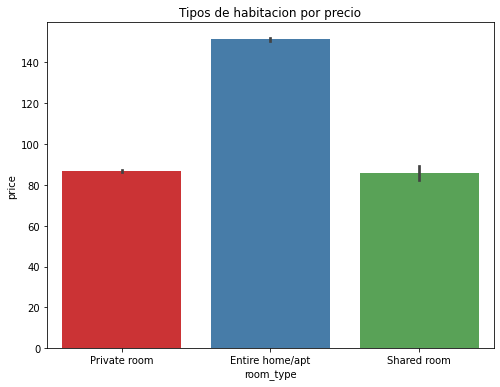

In [48]:
plt.figure(figsize=(8,6))
plt.title("Tipos de habitacion por precio")
sns.barplot(y='price',x='room_type',data=df_3_NY, palette="Set1")
plt.show()

Vemos que alquilar una habitación privada y una compartida tienen un precio similar y alquilar la casa completa nos puede salir casi el doble

Vamos a ver que barrios tenemos en New York

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Cantidad de alojamientos por barrio'}, xlabel='neighbourhood_group', ylabel='count'>

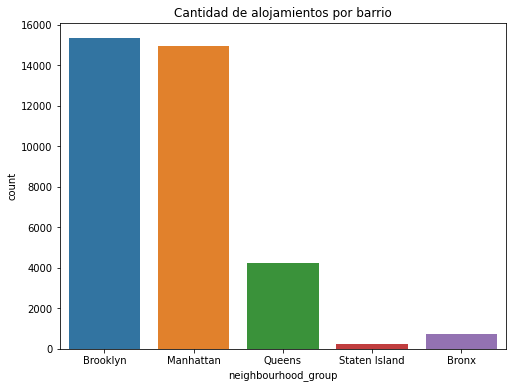

In [49]:
plt.figure(figsize=(8,6))
plt.title("Cantidad de alojamientos por barrio")
sns.countplot(df_3_NY['neighbourhood_group'])

Si nos preguntan : ¿A que barrio tenemos que ir si queremos alquilar una casa completa al menor precio?
Lo vamos a ver en el siguiente grafico para que nos ayude a orientarnos y buscar la mejor opcion

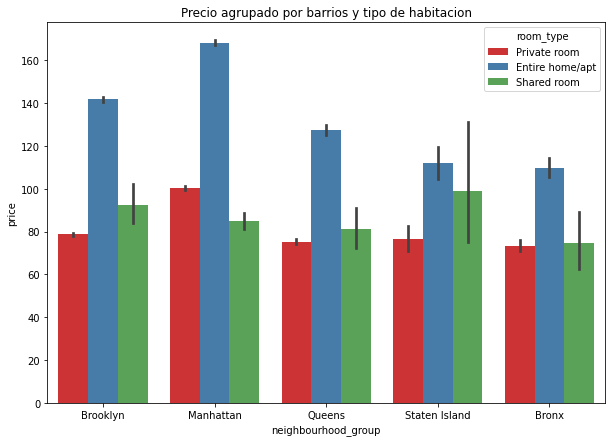

In [50]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y="price", hue = "room_type",data = df_3_NY, palette="Set1")
plt.title("Precio agrupado por barrios y tipo de habitacion")
plt.show()

Ahora vemos en la grafica que el Bronx es el barrio mas barato, seguido de muy cerca por Staten Island

En este dataset tenemos las columnas latitude y longitude, esto nos indica que podemos graficar las coordenadas de los alojamientos y barrios que tenemos.

Tomemos estos datos y grafiquemoslos divididos por barrio

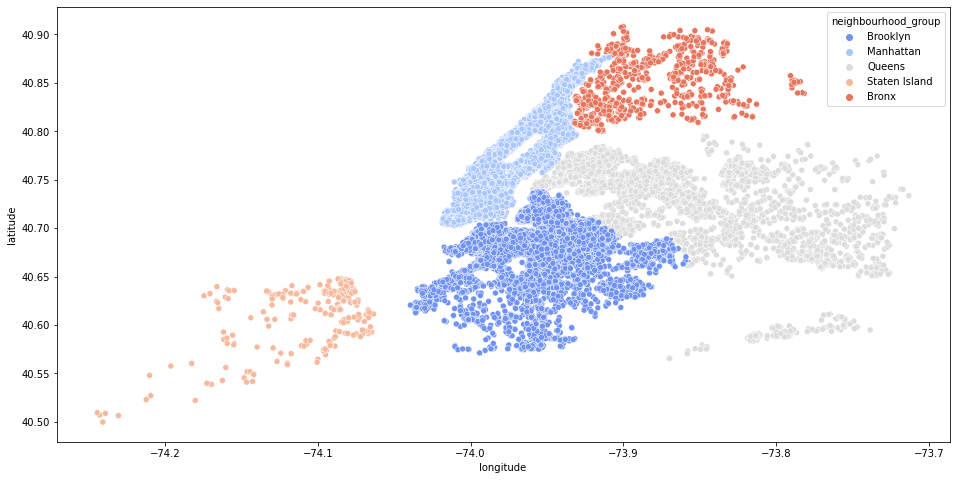

In [51]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df_3_NY["latitude"],x=df_3_NY["longitude"],hue=df_3_NY["neighbourhood_group"],palette="coolwarm")
plt.show()

Feature Engineering
Vemos que en nuestro dataset tenemos conjuntos de datos categóricos como los barrios y tipos de habitación, lo que podemos hacer es transformar cada categoría a una columna y completar los campos con 1 en caso de que el alojamiento sea en ese barrio y un 0 en caso de que no lo sea.

In [53]:
#Vamos a trabajar solo con las columnas categoricas
df_NY_cat = df_3_NY[["neighbourhood_group","neighbourhood","room_type"]]
df_NY_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [54]:
#Podemos armar un diccionario y mapearlo a nuestro dataset

dic_room_type = {
    "Private room":0,
    "Entire home/apt":1,
    "Shared room":2
}

In [55]:
#Con la funcion map unimos el diccionario a nuestro dataset agregandolo a una nueva columna "dic_room_type"
df_NY_cat['dic_room_type'] = df_NY_cat['room_type'].map(dic_room_type)

/tmp/ipykernel_3125/4032816689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NY_cat['dic_room_type'] = df_NY_cat['room_type'].map(dic_room_type)


In [57]:
df_NY_cat.head()

,neighbourhood_group,neighbourhood,room_type,dic_room_type
0,Brooklyn,Kensington,Private room,0
1,Manhattan,Midtown,Entire home/apt,1
2,Manhattan,Harlem,Private room,0
3,Brooklyn,Clinton Hill,Entire home/apt,1
4,Manhattan,East Harlem,Entire home/apt,1


Esta opción de transformación de datos no es muy conveniente ya que algunas categorías tendrán mas "pesos" que otras, en el caso de "Shared room":2 y "Entire home/apt":1 un modelo de Machine Learning interpretaria que "Shared room" tiene mas relevancia que "Entire home/apt".

Esto solo aplicaría para variables categóricas ordinales, como por ejemplo una alerta baja, media y alta o las notas A,B,C,D,E y F